In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('final_en.csv')
data

title  \
0     Trump backs off praise of Russia's Putin after...   
1     Trump's funding request for U.S. border wall h...   
2      As Votes For Trump Went Up, Canada’s Immigrat...   
3     U.S. Navy, shipbuilders ready for Trump's expa...   
4     Trump defends DACA move, urges Congress to ena...   
...                                                 ...   
9995  ESTABLISHMENT GOP END TIMES? Why Republican Ca...   
9996  Republican tax fight complicates plan to pass ...   
9997  Nigeria offers to meet militants after ceasefi...   
9998   Mike Pence: Trump Is Probably Going To Tortur...   
9999  CNN FIRES BLACK DEM Party Chair: New Wikileaks...   

                                                   text  lebel  
0     HENDERSON, Nev. (Reuters) - U.S. Republican pr...      1  
1     WASHINGTON (Reuters) - President Donald Trump’...      1  
2     Well, sad to say, it s a sure chance the next ...      0  
3     SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...      1  
4     WASHINGTON (Reuters) - President Donald Trump ...      1  
...                                                 ...    ...  
9995  In the real world, if your boss is damaging yo...      0  
9996  WASHINGTON (Reuters) - A budget plan crucial t...      1  
9997  ABUJA (Reuters) - The minister for Nigeria s o...      1  
9998  On Face The Nation, Mike Pence showed exactly ...      0  
9999  You just can t make this up! CNN fires black D...      0  

[10000 rows x 3 columns]

In [4]:
data.isna().sum()

title    0
text     0
lebel    0
dtype: int64

In [5]:
(data[data['lebel']==0].shape[0])/ data.shape[0] * 100

50.0

In [6]:
(data[data['lebel']==1].shape[0])/ data.shape[0] * 100

50.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10000 non-null  object
 1   text    10000 non-null  object
 2   lebel   10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [8]:
data.nunique()

title    9711
text     9607
lebel       2
dtype: int64

In [9]:
data.duplicated().sum()

270

In [10]:
data = data.drop_duplicates(keep='first')

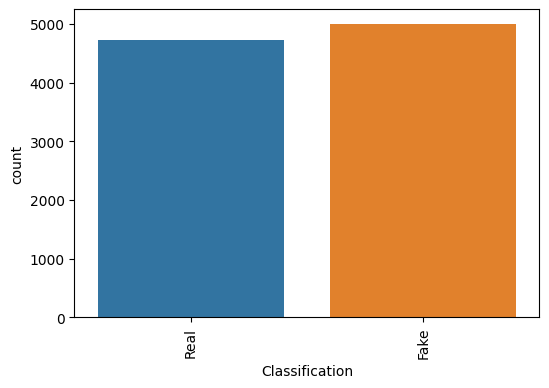

In [11]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="lebel", data=data)
ax.set_xticklabels(['Real', 'Fake'])
plt.xlabel('Classification')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

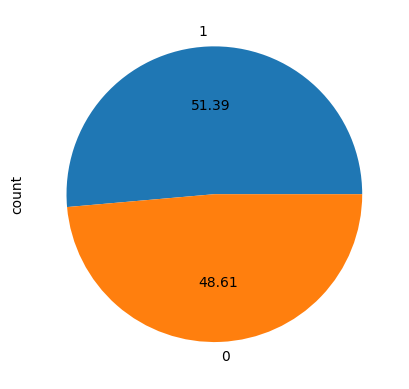

In [12]:
data['lebel'].value_counts().plot.pie(autopct='%.2f')

In [13]:
data

title  \
0     Trump backs off praise of Russia's Putin after...   
1     Trump's funding request for U.S. border wall h...   
2      As Votes For Trump Went Up, Canada’s Immigrat...   
3     U.S. Navy, shipbuilders ready for Trump's expa...   
4     Trump defends DACA move, urges Congress to ena...   
...                                                 ...   
9995  ESTABLISHMENT GOP END TIMES? Why Republican Ca...   
9996  Republican tax fight complicates plan to pass ...   
9997  Nigeria offers to meet militants after ceasefi...   
9998   Mike Pence: Trump Is Probably Going To Tortur...   
9999  CNN FIRES BLACK DEM Party Chair: New Wikileaks...   

                                                   text  lebel  
0     HENDERSON, Nev. (Reuters) - U.S. Republican pr...      1  
1     WASHINGTON (Reuters) - President Donald Trump’...      1  
2     Well, sad to say, it s a sure chance the next ...      0  
3     SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...      1  
4     WASHINGTON (Reuters) - President Donald Trump ...      1  
...                                                 ...    ...  
9995  In the real world, if your boss is damaging yo...      0  
9996  WASHINGTON (Reuters) - A budget plan crucial t...      1  
9997  ABUJA (Reuters) - The minister for Nigeria s o...      1  
9998  On Face The Nation, Mike Pence showed exactly ...      0  
9999  You just can t make this up! CNN fires black D...      0  

[9730 rows x 3 columns]

In [14]:
data['title_length'] = data['title'].apply(lambda x : len(x.strip().split()))
data['text_length'] = data['text'].apply(lambda x : len(x.strip().split()))

C:\Users\parla\AppData\Local\Temp\ipykernel_2324\706033996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title_length'] = data['title'].apply(lambda x : len(x.strip().split()))
C:\Users\parla\AppData\Local\Temp\ipykernel_2324\706033996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_length'] = data['text'].apply(lambda x : len(x.strip().split()))


C:\Users\parla\AppData\Local\Temp\ipykernel_2324\3954171499.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['lebel'] == 1]['title_length'],
C:\Users\parla\AppData\Local\Temp\ipykernel_2324\3954171499.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['lebel'] == 0]['titl

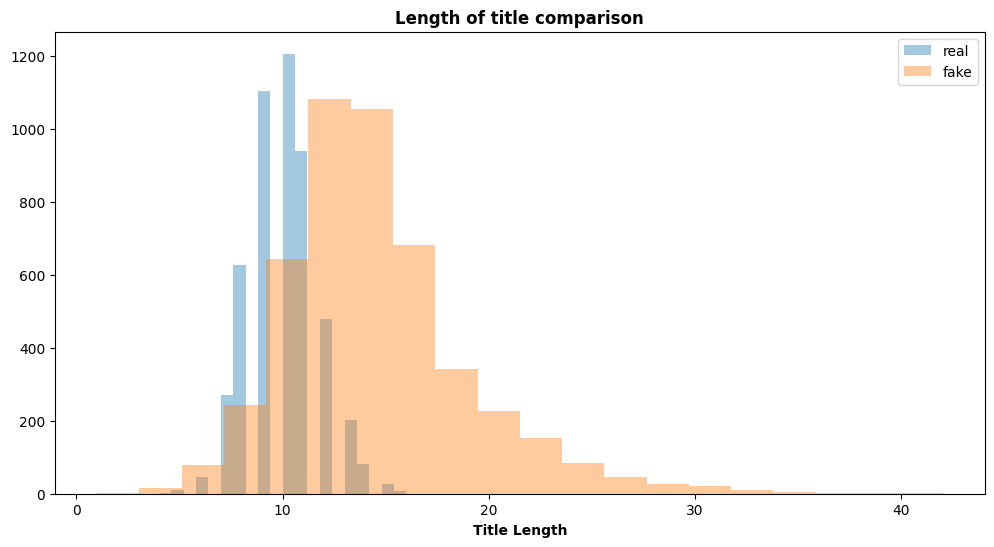

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['lebel'] == 1]['title_length'], 
             kde=False, label='real', bins=20)
sns.distplot(data[data['lebel'] == 0]['title_length'], 
             kde=False, label='fake', bins=20)
plt.xlabel('Title Length', weight='bold')
plt.title('Length of title comparison', weight='bold')
plt.legend()
plt.show()

C:\Users\parla\AppData\Local\Temp\ipykernel_2324\3003294384.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['lebel'] == 1]['text_length'],
C:\Users\parla\AppData\Local\Temp\ipykernel_2324\3003294384.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['lebel'] == 0]['text_

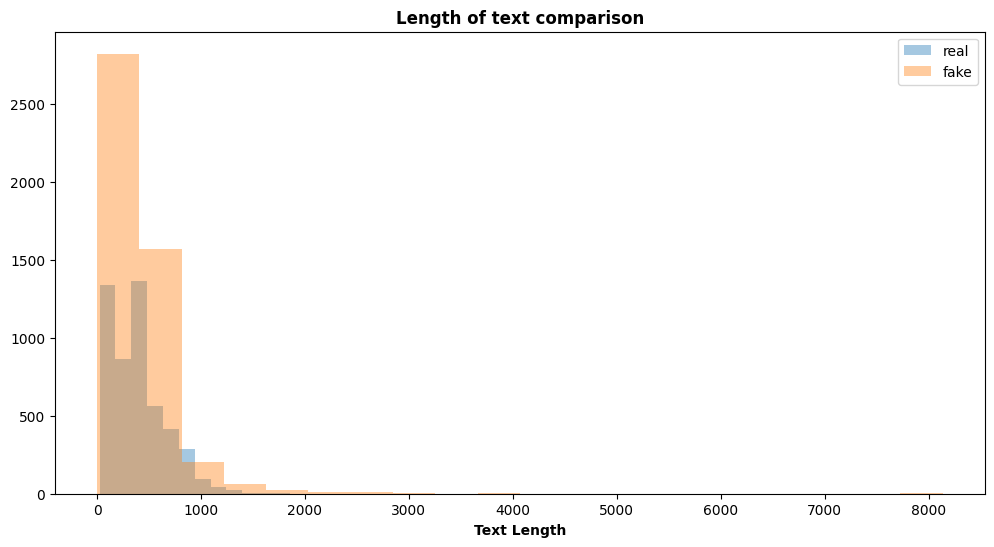

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['lebel'] == 1]['text_length'], 
             kde=False, label='real', bins=20)
sns.distplot(data[data['lebel'] == 0]['text_length'], 
             kde=False, label='fake', bins=20)
plt.xlabel('Text Length', weight='bold')
plt.title('Length of text comparison', weight='bold')
plt.legend()
plt.show()

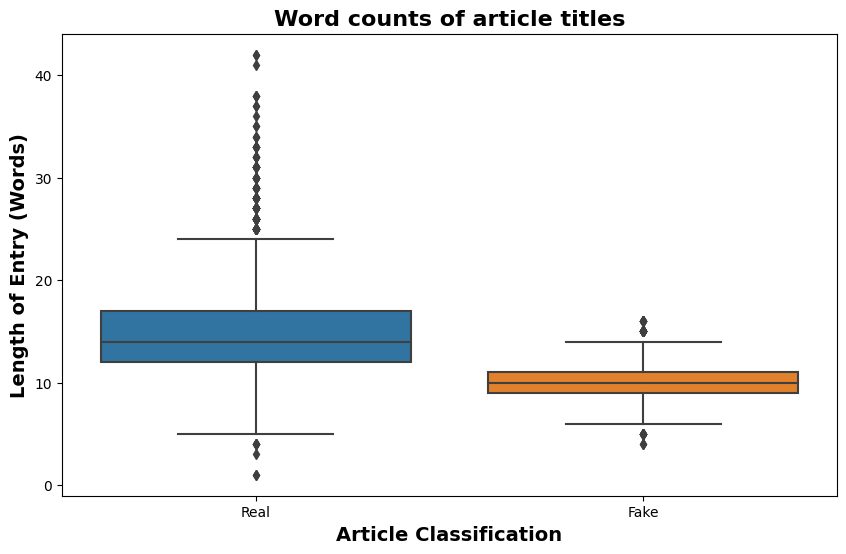

In [17]:
fig = plt.figure(figsize=(10, 6))
plt.title("Word counts of article titles", fontsize=16, weight='bold')
ax = sns.boxplot(x="lebel", y="title_length", data=data)
ax.set_xticklabels(['Real', 'Fake'])
ax.set_xlabel("Article Classification", fontsize=14, weight='bold') 
ax.set_ylabel("Length of Entry (Words)", fontsize=14, weight='bold')
plt.show()

In [18]:
data['combined'] = data['title'] + ' ' + data['text']

C:\Users\parla\AppData\Local\Temp\ipykernel_2324\2307295825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['combined'] = data['title'] + ' ' + data['text']


In [19]:
##pip install wordcloud

In [20]:
from wordcloud import WordCloud

In [21]:
data

title  \
0     Trump backs off praise of Russia's Putin after...   
1     Trump's funding request for U.S. border wall h...   
2      As Votes For Trump Went Up, Canada’s Immigrat...   
3     U.S. Navy, shipbuilders ready for Trump's expa...   
4     Trump defends DACA move, urges Congress to ena...   
...                                                 ...   
9995  ESTABLISHMENT GOP END TIMES? Why Republican Ca...   
9996  Republican tax fight complicates plan to pass ...   
9997  Nigeria offers to meet militants after ceasefi...   
9998   Mike Pence: Trump Is Probably Going To Tortur...   
9999  CNN FIRES BLACK DEM Party Chair: New Wikileaks...   

                                                   text  lebel  title_length  \
0     HENDERSON, Nev. (Reuters) - U.S. Republican pr...      1             9   
1     WASHINGTON (Reuters) - President Donald Trump’...      1            12   
2     Well, sad to say, it s a sure chance the next ...      0            13   
3     SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...      1             8   
4     WASHINGTON (Reuters) - President Donald Trump ...      1            10   
...                                                 ...    ...           ...   
9995  In the real world, if your boss is damaging yo...      0            12   
9996  WASHINGTON (Reuters) - A budget plan crucial t...      1            10   
9997  ABUJA (Reuters) - The minister for Nigeria s o...      1            11   
9998  On Face The Nation, Mike Pence showed exactly ...      0            10   
9999  You just can t make this up! CNN fires black D...      0            22   

      text_length                                           combined  
0             670  Trump backs off praise of Russia's Putin after...  
1             406  Trump's funding request for U.S. border wall h...  
2             328   As Votes For Trump Went Up, Canada’s Immigrat...  
3             400  U.S. Navy, shipbuilders ready for Trump's expa...  
4             113  Trump defends DACA move, urges Congress to ena...  
...           ...                                                ...  
9995          645  ESTABLISHMENT GOP END TIMES? Why Republican Ca...  
9996          439  Republican tax fight complicates plan to pass ...  
9997          358  Nigeria offers to meet militants after ceasefi...  
9998          460   Mike Pence: Trump Is Probably Going To Tortur...  
9999          324  CNN FIRES BLACK DEM Party Chair: New Wikileaks...  

[9730 rows x 6 columns]

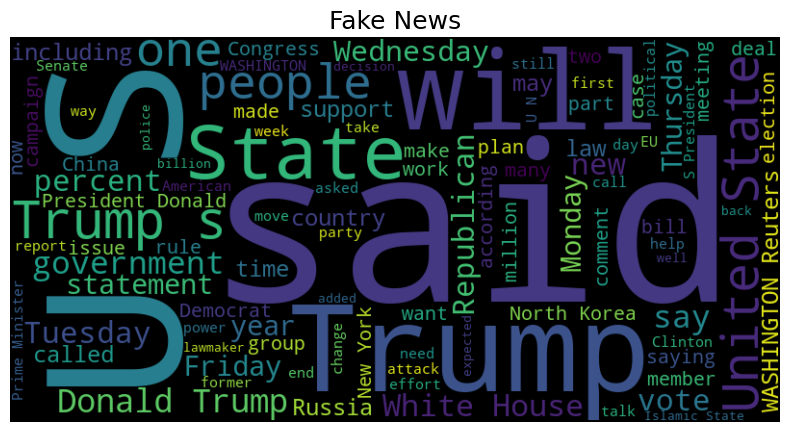

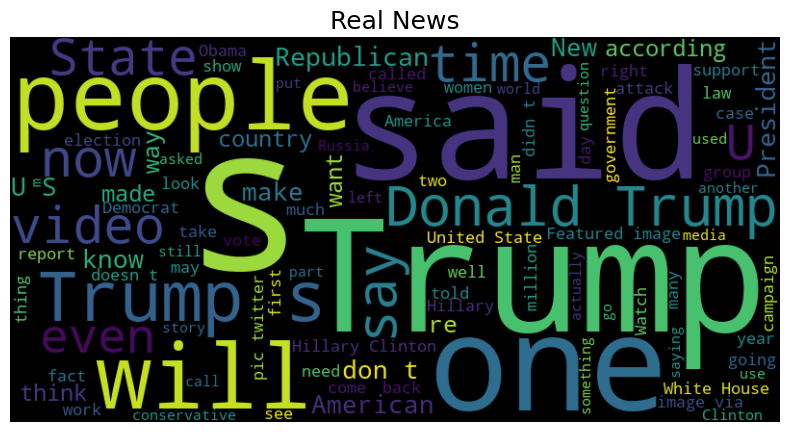

In [22]:
fake_news = data[data['lebel'] == 1]
real_news = data[data['lebel'] == 0]

# Generate word clouds
def generate_word_cloud(df, title):
    text = " ".join(article for article in df)
    wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

generate_word_cloud(fake_news['combined'], 'Fake News')

generate_word_cloud(real_news['combined'], 'Real News')

In [23]:
X = data['combined']
y = data['lebel']
print(X.shape)
print(y.shape)

(9730,)
(9730,)


In [24]:
#pip uninstall nltk

In [25]:
import re
import string
import nltk


In [26]:
# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('punkt_tab')

In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [28]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(f'[{string.punctuation}]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a string
    return ' '.join(tokens)

In [29]:
s = '''Good muffins cost $3.88\nin New York.  Please buy me
... two of them.\n\nThanks.'''
preprocess_text(s)

'good muffins cost 388 new york please buy two thanks'

عدد رو خراب کرد ولی ما توی متنمون الان اعداد برامون زیاد اهمیت ندارند.

In [30]:
X_clean = X.apply(preprocess_text)

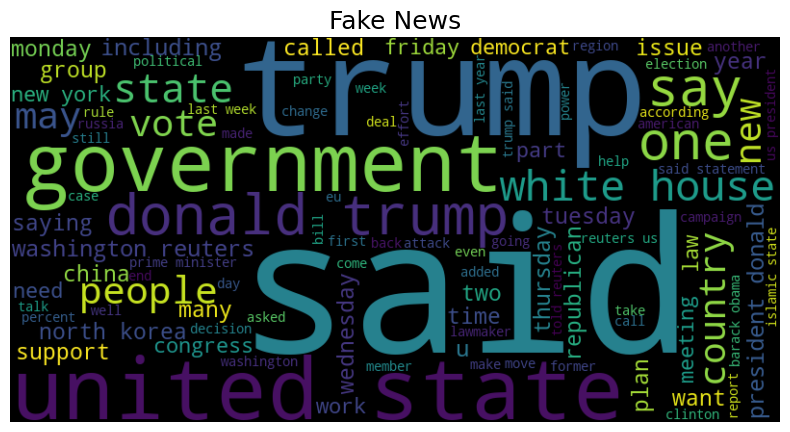

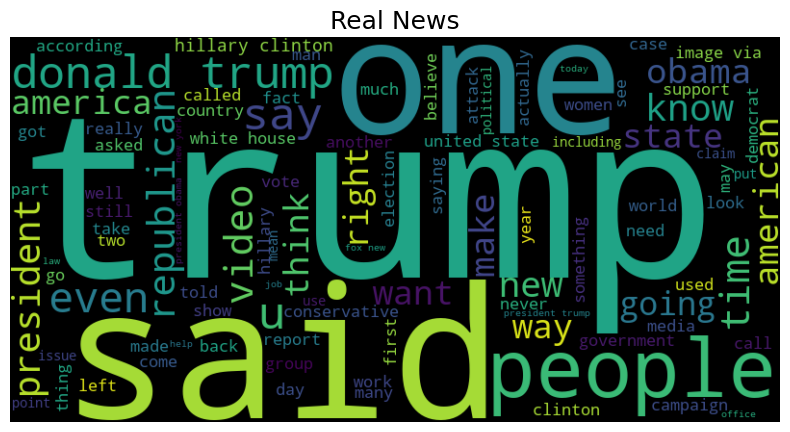

In [31]:
fake_news = data[data['lebel'] == 1]
real_news = data[data['lebel'] == 0]

# Generate word clouds
def generate_word_cloud(df, title):
    text = " ".join(article for article in df)
    wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

generate_word_cloud(fake_news['combined'].apply(preprocess_text), 'Fake News')

generate_word_cloud(real_news['combined'].apply(preprocess_text), 'Real News')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean,y,test_size = 0.25, random_state=42)

## Extracting Features from the Text

Convert text to vectors


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vectorization = TfidfVectorizer()
X_train_v = vectorization.fit_transform(X_train)
X_test_v = vectorization.transform(X_test)

X_train_clean_v = vectorization.fit_transform(X_train_clean)
X_test_clean_v = vectorization.transform(X_test_clean)

In [36]:
X_train_v.shape, X_train_clean_v

((7297, 55677),
 <7297x83281 sparse matrix of type '<class 'numpy.float64'>'
 	with 1219454 stored elements in Compressed Sparse Row format>)

In [37]:
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS, Isomap, TSNE

for sparse matrix, non centered data we cant use PCA, truncated SVD

In [38]:
##X_2d_pca = SparsePCA(n_components=2).fit_transform(X_train_v.toarray())

In [39]:
#plt.scatter(X_2d_pca[:, 0], X_2d_pca[:, 1], c=y, alpha=0.4);

In [40]:
from sklearn.decomposition import TruncatedSVD

In [41]:
svd = TruncatedSVD(n_components=2) 
X_train_svd = svd.fit_transform(X_train_v)
X_test_svd = svd.transform(X_test_v)


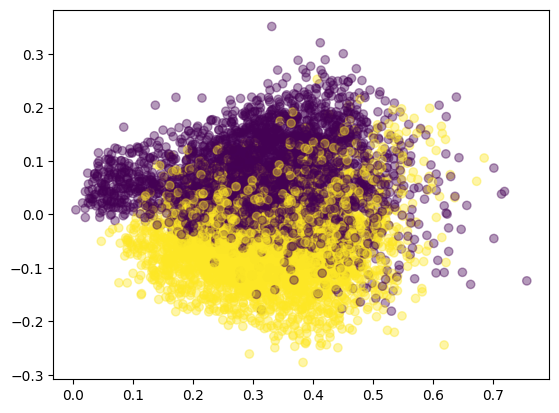

In [42]:
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, alpha=0.4);

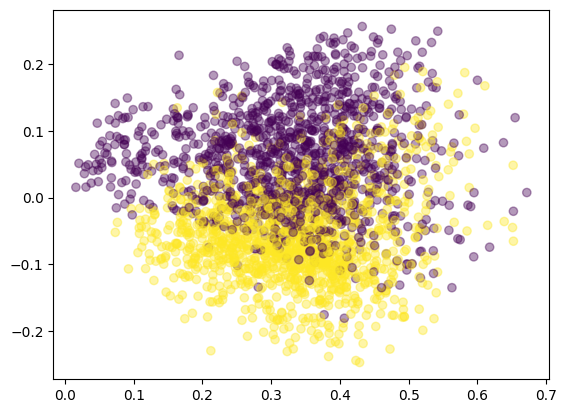

In [43]:
plt.scatter(X_test_svd[:, 0], X_test_svd[:, 1], c=y_test, alpha=0.4);

In [44]:
X_2d_iso = Isomap(n_components=2, n_neighbors=20).fit_transform(X_train_v)


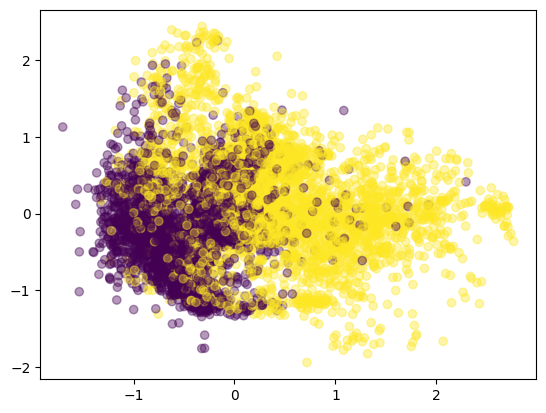

In [45]:
plt.scatter(X_2d_iso[:, 0], X_2d_iso[:, 1], c=y_train, alpha=0.4);

In [46]:
##X_2d_mds= MDS(n_components=2, normalized_stress='auto').fit_transform(X_train_v)

In [47]:
# plt.scatter(X_2d_mds[:, 0], X_2d_mds[:, 1], c=y_train, alpha=0.4);

In [48]:
import plotly.express as px

In [49]:
X_3d_iso = Isomap(n_components=3, n_neighbors=20).fit_transform(X_train_v)

In [50]:

px.scatter_3d(x= X_3d_iso[:, 0],y =  X_3d_iso[:, 1],z = X_3d_iso[:, 2] , color=y_train)

In [51]:
X_2d_tsne= TSNE(n_components=2,init="random",verbose=1, perplexity=50, n_jobs=-1).fit_transform(X_train_v)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7297 samples in 0.023s...
[t-SNE] Computed neighbors for 7297 samples in 1504.896s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7297
[t-SNE] Computed conditional probabilities for sample 2000 / 7297
[t-SNE] Computed conditional probabilities for sample 3000 / 7297
[t-SNE] Computed conditional probabilities for sample 4000 / 7297
[t-SNE] Computed conditional probabilities for sample 5000 / 7297
[t-SNE] Computed conditional probabilities for sample 6000 / 7297
[t-SNE] Computed conditional probabilities for sample 7000 / 7297
[t-SNE] Computed conditional probabilities for sample 7297 / 7297
[t-SNE] Mean sigma: 0.271238
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.926254
[t-SNE] KL divergence after 1000 iterations: 2.241398


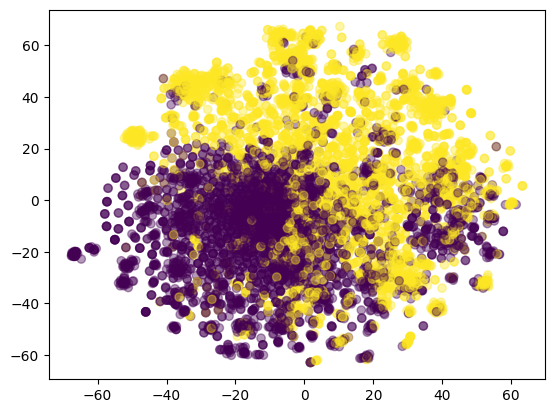

In [52]:
plt.scatter(X_2d_tsne[:, 0], X_2d_tsne[:, 1], c=y_train, alpha=0.4);

In [53]:
X_3d_tsne= TSNE(n_components=3,init="random",verbose=1, perplexity=50, n_jobs=-1).fit_transform(X_train_v)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7297 samples in 0.026s...
[t-SNE] Computed neighbors for 7297 samples in 1502.359s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7297
[t-SNE] Computed conditional probabilities for sample 2000 / 7297
[t-SNE] Computed conditional probabilities for sample 3000 / 7297
[t-SNE] Computed conditional probabilities for sample 4000 / 7297
[t-SNE] Computed conditional probabilities for sample 5000 / 7297
[t-SNE] Computed conditional probabilities for sample 6000 / 7297
[t-SNE] Computed conditional probabilities for sample 7000 / 7297
[t-SNE] Computed conditional probabilities for sample 7297 / 7297
[t-SNE] Mean sigma: 0.271238
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.505547
[t-SNE] KL divergence after 1000 iterations: 2.194187


In [54]:
px.scatter_3d(x= X_3d_tsne[:, 0],y =  X_3d_tsne[:, 1],z = X_3d_tsne[:, 2] , color=y_train)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [56]:
X_train_v.shape

(7297, 55677)

In [57]:
y_train.shape

(7297,)

In [58]:
def get_var_name(var):
    return [name for name, value in globals().items() if value is var][0]

In [59]:
y_preds=[]
clfs = []



In [60]:
def modeling(model, x_train_v, x_test_v, y_train, y_test):
    
    model.fit(x_train_v, y_train)
    y_pred = model.predict(x_test_v)
    y_preds.append(y_pred)
    clfs.append(get_var_name(model))
    
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))

In [61]:
knn = KNN(n_neighbors=3)
modeling(knn, X_train_v, X_test_v, y_train, y_test)

0.8446362515413071
              precision    recall  f1-score   support

        Fake       0.88      0.78      0.83      1161
        Real       0.82      0.90      0.86      1272

    accuracy                           0.84      2433
   macro avg       0.85      0.84      0.84      2433
weighted avg       0.85      0.84      0.84      2433



In [62]:
logesticregression = LogisticRegression(max_iter=1000)
modeling(logesticregression, X_train_v, X_test_v, y_train, y_test)

0.9712289354706124
              precision    recall  f1-score   support

        Fake       0.98      0.96      0.97      1161
        Real       0.96      0.98      0.97      1272

    accuracy                           0.97      2433
   macro avg       0.97      0.97      0.97      2433
weighted avg       0.97      0.97      0.97      2433



In [63]:
svc = SVC()
modeling(svc, X_train_v, X_test_v,y_train, y_test)

0.9827373612823674
              precision    recall  f1-score   support

        Fake       0.99      0.98      0.98      1161
        Real       0.98      0.99      0.98      1272

    accuracy                           0.98      2433
   macro avg       0.98      0.98      0.98      2433
weighted avg       0.98      0.98      0.98      2433



In [64]:
randomforest = RFC(n_estimators=50, criterion = 'gini')
modeling(randomforest, X_train_v, X_test_v,y_train, y_test)

0.9823263460748047
              precision    recall  f1-score   support

        Fake       0.98      0.98      0.98      1161
        Real       0.98      0.98      0.98      1272

    accuracy                           0.98      2433
   macro avg       0.98      0.98      0.98      2433
weighted avg       0.98      0.98      0.98      2433



In [65]:
# navebayes = GaussianNB()
# modeling(navebayes, X_train_v, X_test_v,y_train, y_test)

In [66]:
multinomialnavebayes = MultinomialNB()
modeling(multinomialnavebayes, X_train_v, X_test_v,y_train, y_test)

0.9214960953555281
              precision    recall  f1-score   support

        Fake       0.93      0.90      0.92      1161
        Real       0.91      0.94      0.93      1272

    accuracy                           0.92      2433
   macro avg       0.92      0.92      0.92      2433
weighted avg       0.92      0.92      0.92      2433



In [67]:
decisiontree = DTC(criterion= 'gini')
modeling(decisiontree, X_train_v, X_test_v,y_train, y_test)

0.9921907110563091
              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      1161
        Real       0.99      1.00      0.99      1272

    accuracy                           0.99      2433
   macro avg       0.99      0.99      0.99      2433
weighted avg       0.99      0.99      0.99      2433



In [68]:
adaboost = ABC(n_estimators=50)
modeling(adaboost, X_train_v, X_test_v,y_train, y_test)

0.9950678175092479
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      1161
        Real       0.99      1.00      1.00      1272

    accuracy                           1.00      2433
   macro avg       1.00      0.99      1.00      2433
weighted avg       1.00      1.00      1.00      2433



In [69]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
gbc = GBC(random_state=0)
modeling(gbc, X_train_v, X_test_v,y_train, y_test)

0.9942457870941225
              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      1161
        Real       0.99      1.00      0.99      1272

    accuracy                           0.99      2433
   macro avg       0.99      0.99      0.99      2433
weighted avg       0.99      0.99      0.99      2433



In [70]:
# bagging =  BaggingClassifier(estimator=KNN(n_neighbors=7),
#           n_estimators=20)
# modeling(bagging, X_train_v, X_test_v,y_train, y_test)

In [71]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [72]:
def compute_metrics(X_test, y_pred, y_test):
    metrics = {
        'accuracy_score': accuracy_score(y_test,  y_pred),
        'precision_score': precision_score(y_test, y_pred),
        'recall_score': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
       
    }
    return metrics

In [73]:
metrics_dict = {name: {} for name in clfs}

for name, y_pred in zip(clfs, y_preds):
    metrics = compute_metrics(X_test, y_pred, y_test)
    metrics_dict[name] = metrics

metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

                      accuracy_score  precision_score  recall_score  f1_score
knn                         0.844636         0.819286      0.901730  0.858533
logesticregression          0.971229         0.964451      0.981132  0.972720
svc                         0.982737         0.978227      0.988994  0.983581
randomforest                0.982326         0.981961      0.984277  0.983117
multinomialnavebayes        0.921496         0.914812      0.937107  0.925825
decisiontree                0.992191         0.989836      0.995283  0.992552
adaboost                    0.995068         0.992958      0.997642  0.995294
gbc                         0.994246         0.990640      0.998428  0.994518


In [74]:
len(y_preds)


8

In [75]:
clfs

['knn',
 'logesticregression',
 'svc',
 'randomforest',
 'multinomialnavebayes',
 'decisiontree',
 'adaboost',
 'gbc']

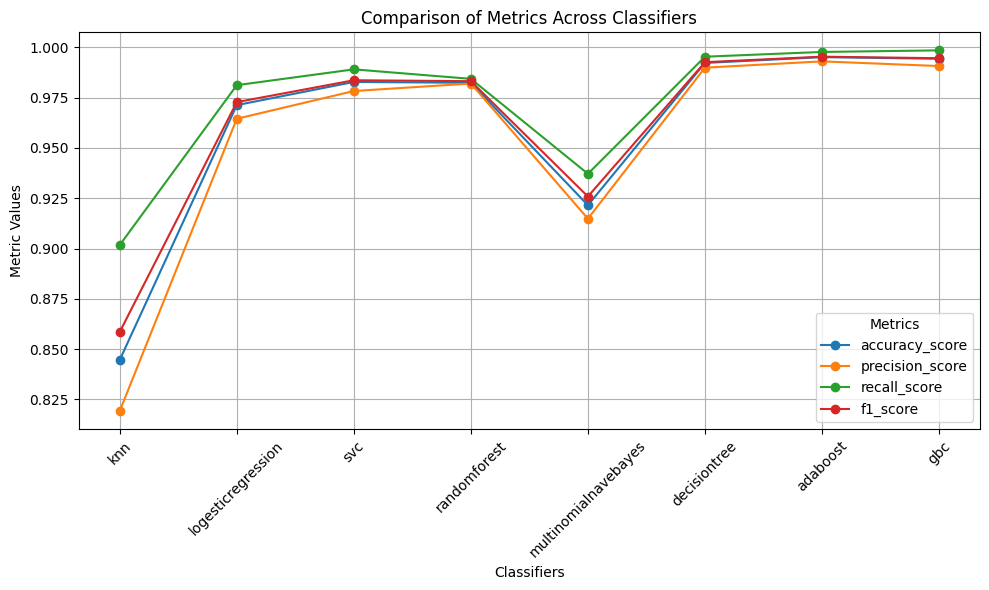

In [76]:
plt.figure(figsize=(10, 6))
for metric in metrics_df.columns:
    plt.plot(metrics_df.index, metrics_df[metric], marker='o', label=metric)

plt.title('Comparison of Metrics Across Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Metric Values')
plt.legend(title='Metrics')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [77]:
from sklearn.metrics import confusion_matrix

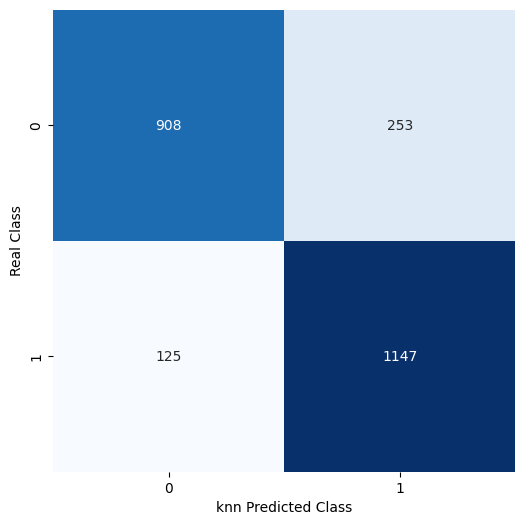

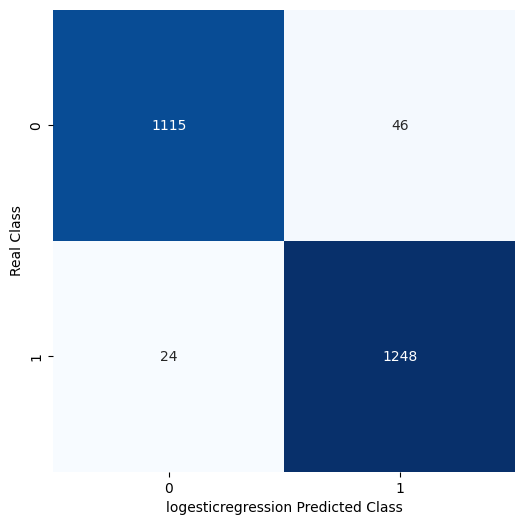

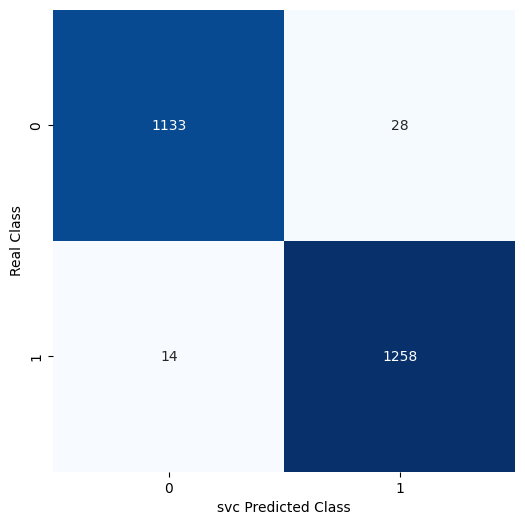

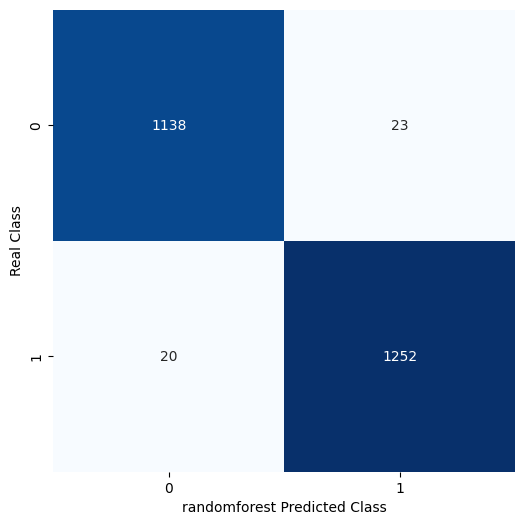

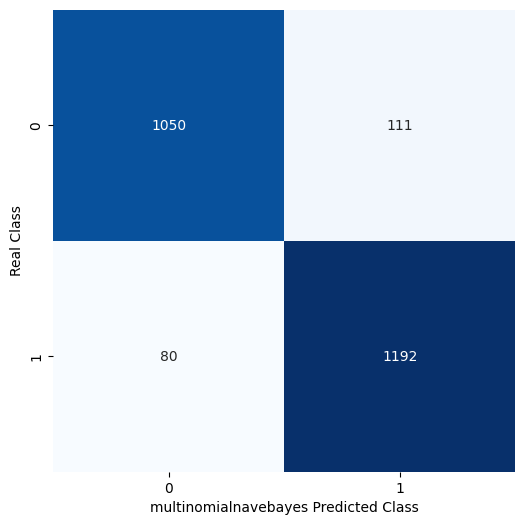

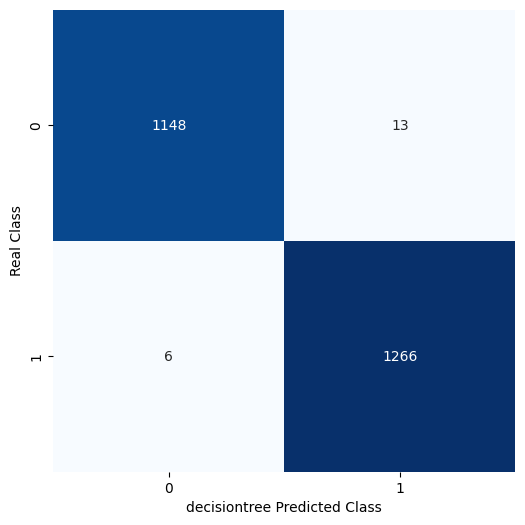

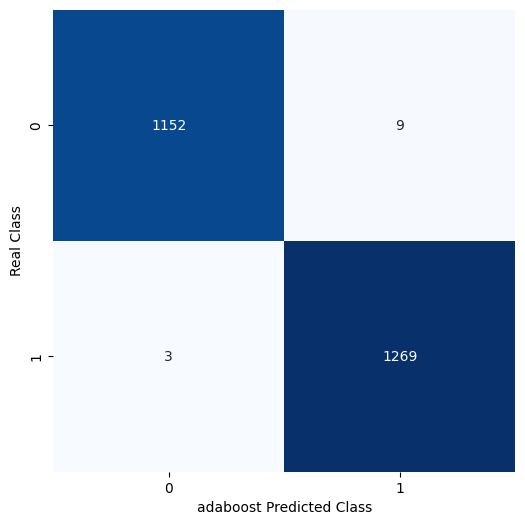

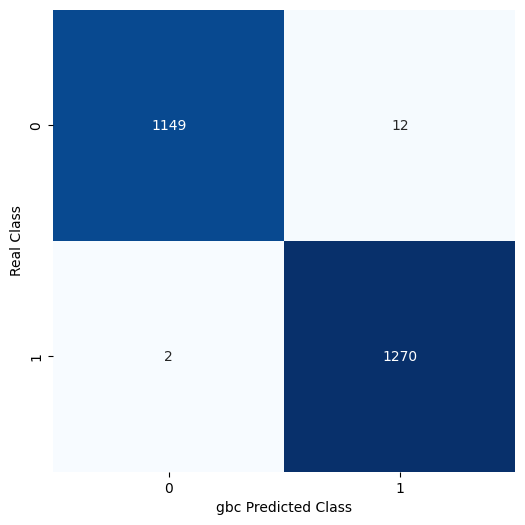

In [78]:
for clf, y_pred in zip(clfs, y_preds):
  
    cm = confusion_matrix(y_test, y_pred)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
    plt.xlabel(f'{clf} Predicted Class')
    plt.ylabel('Real Class')
    plt.show()

In [107]:
metrics_df['recall_score'].idxmax()

'gbc'

adaboost has predicted 12 cases wrongly, 9 false negetive, 3 false positive, 
but gradient boosting has predicted 2 false positive it means it didnt find 2 of the fake news and and has considered they would be real news , the least amount of error in finding fake news.
 i think the recall score in this problem is important, best recall score is for gradient boosting classifier.

In [82]:

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RFC(n_estimators=50, criterion = 'gini'),
    'Random Forest depth5': RFC(n_estimators=50, criterion = 'gini', max_depth=5),
    'Naive Bayes': MultinomialNB(),
    'KNN' : KNN(n_neighbors=3),
    'Decision Tree' : DTC(criterion= 'gini'),
    'Adaboost' : ABC(n_estimators=50),
    'Gradient Boosting' : GBC(random_state=0)
    
}

In [87]:
y_train_clean

6045    0
2282    1
445     1
4262    0
7279    0
       ..
5821    1
5263    0
5468    1
860     0
7416    1
Name: lebel, Length: 7297, dtype: int64

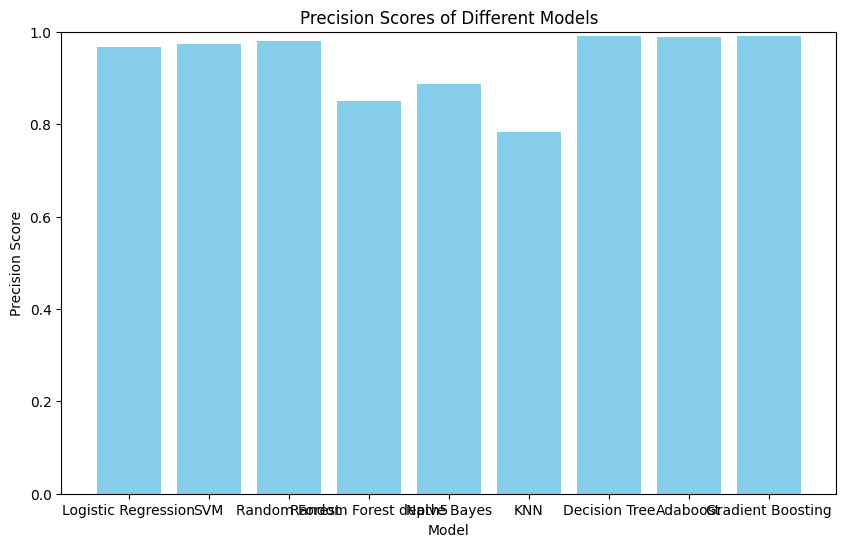

In [90]:
y_preds_clean=[]
precisions = {}

# Train and evaluate each model
for name, model in models.items():
    
    model.fit(X_train_clean_v, y_train_clean)
    y_pred = model.predict(X_test_clean_v)
    
    y_preds_clean.append(y_pred)
    
    precision = precision_score(y_test_clean, y_pred)
    precisions[name] = precision

plt.figure(figsize=(15, 10))
plt.bar(precisions.keys(), precisions.values(), color='skyblue')
plt.title('Precision Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.ylim(0, 1)
plt.show()

In [91]:
metrics_dict_clean = {name: {} for name in models.keys()}

for name, y_pred in zip(models.keys(), y_preds):
    metrics = compute_metrics(X_test, y_pred, y_test)
    metrics_dict_clean[name] = metrics

metrics_clean = pd.DataFrame(metrics_dict_clean).T
print(metrics_clean)

                      accuracy_score  precision_score  recall_score  f1_score
Logistic Regression         0.844636         0.819286      0.901730  0.858533
SVM                         0.971229         0.964451      0.981132  0.972720
Random Forest               0.982737         0.978227      0.988994  0.983581
Random Forest depth5        0.982326         0.981961      0.984277  0.983117
Naive Bayes                 0.921496         0.914812      0.937107  0.925825
KNN                         0.992191         0.989836      0.995283  0.992552
Decision Tree               0.995068         0.992958      0.997642  0.995294
Adaboost                    0.994246         0.990640      0.998428  0.994518
Gradient Boosting                NaN              NaN           NaN       NaN


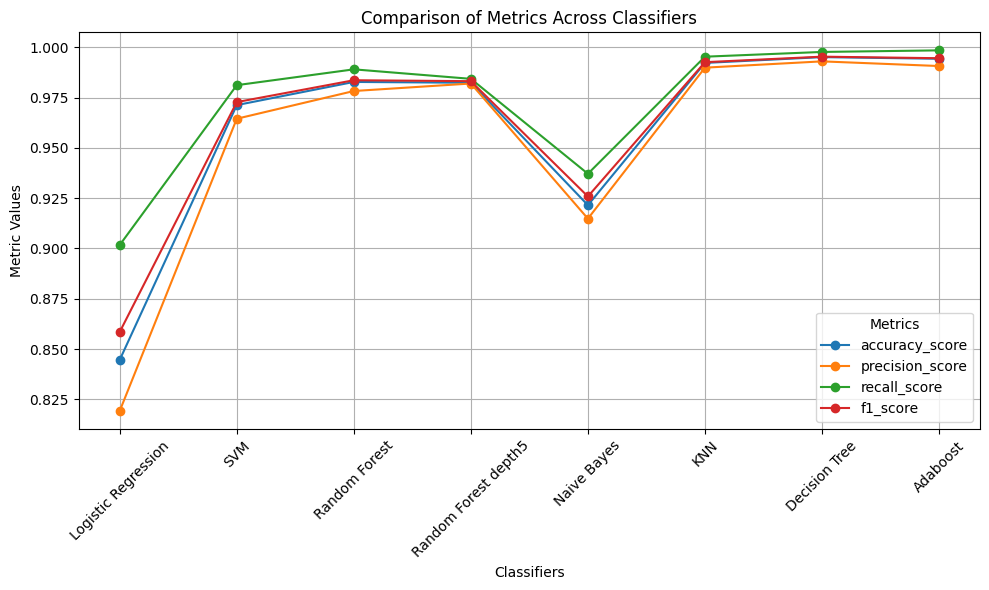

In [92]:
plt.figure(figsize=(10, 6))
for metric in metrics_clean.columns:
    plt.plot(metrics_clean.index, metrics_clean[metric], marker='o', label=metric)

plt.title('Comparison of Metrics Across Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Metric Values')
plt.legend(title='Metrics')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [94]:
metrics_clean.max()

accuracy_score     0.995068
precision_score    0.992958
recall_score       0.998428
f1_score           0.995294
dtype: float64

In [102]:
metrics_clean['recall_score'].idxmax()

'Adaboost'

In [103]:
metrics_clean['precision_score'].idxmax()

'Decision Tree'

In [104]:
metrics_clean['f1_score'].idxmax()

'Decision Tree'

In [105]:
metrics_clean['accuracy_score'].idxmax()

'Decision Tree'

i didnt test results with dimension reduction

تعداد نوع خبر ها در نمودار هیت مپ امده است